In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the marketing_customer_analysis.csv file. You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the files_for_lab folder.

Get the data
Use the jupyter file from the last lab (Customer Analysis Round 3)

Complete the following task
1) √ Check the data types of the columns. 
2) Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
2) Now we will try to check the normality of the numerical variables visually
2.1) Use seaborn library to construct distribution plots for the numerical variables
2.2 Use Matplotlib to construct histograms
2.3 Do the distributions for different numerical variables look like a normal distribution

7) For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

8) Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [20]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error

In [4]:
df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis_7.csv')

### Check the data types of the columns. 

In [5]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [6]:
# rename columns to lower case
df.columns = df.columns.str.lower()

In [7]:
df['total claim amount']

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: total claim amount, Length: 9134, dtype: float64

In [8]:
df.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [9]:
#get columns only with numerical data

df_numerical = df.select_dtypes(include=[np.number])
df_numerical.head(20)

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
5,8256.297800,62902,69,14,94,0,2,159.383042
6,5380.898636,55350,67,0,13,0,9,321.600000
7,7216.100311,0,101,0,68,0,4,363.029680
8,24127.504020,14072,71,13,3,0,2,511.200000
9,7388.178085,28812,93,17,7,0,8,425.527834


In [10]:
#get columns only with categorical data

df_categorical = df.select_dtypes(include=[np.object_])
df_categorical.head()

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


## Now we will try to check the normality of the numerical variables visually

- Use seaborn library to construct distribution plots for the numerical variables
- Use Matplotlib to construct histograms
- Do the distributions for different numerical variables look like a normal distribution

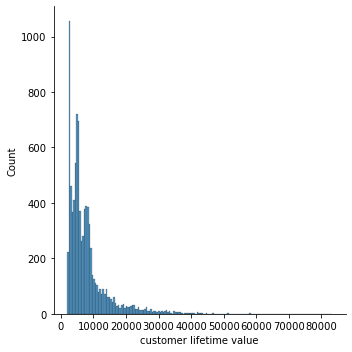

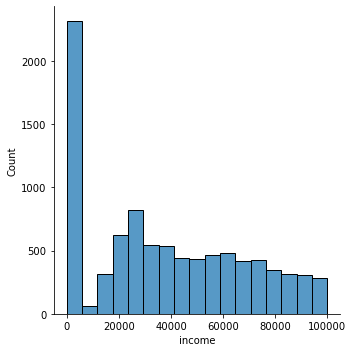

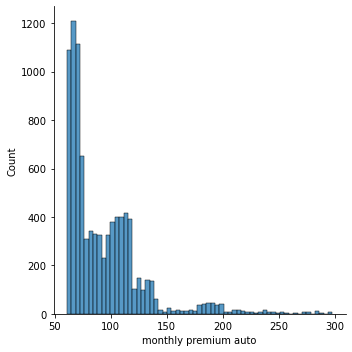

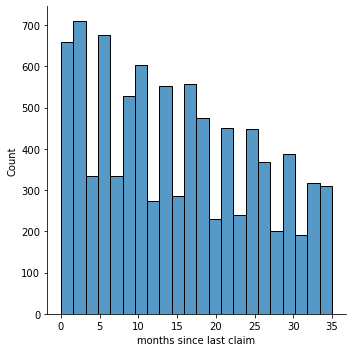

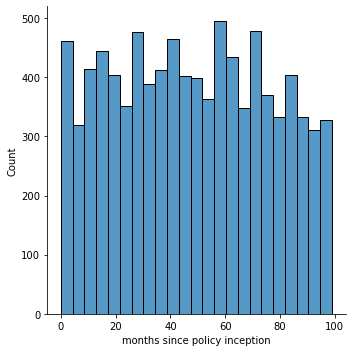

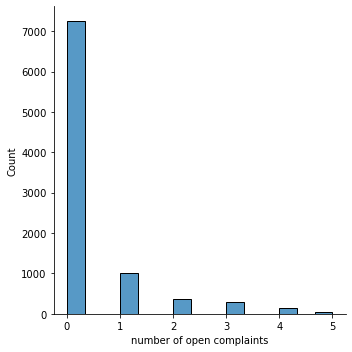

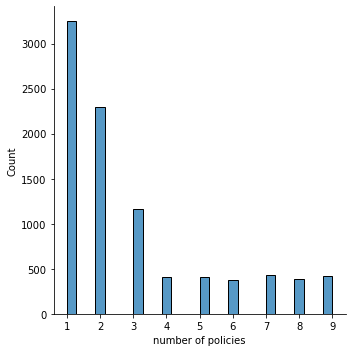

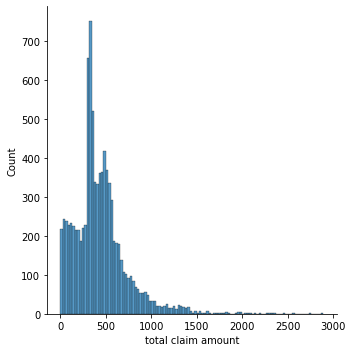

In [11]:
sns.displot(df_numerical['customer lifetime value'])
sns.displot(df_numerical['income'])
sns.displot(df_numerical['monthly premium auto'])
sns.displot(df_numerical['months since last claim'])
sns.displot(df_numerical['months since policy inception'])
sns.displot(df_numerical['number of open complaints'])
sns.displot(df_numerical['number of policies'])
sns.displot(df_numerical['total claim amount']) 

Use Matplotlib to construct histograms

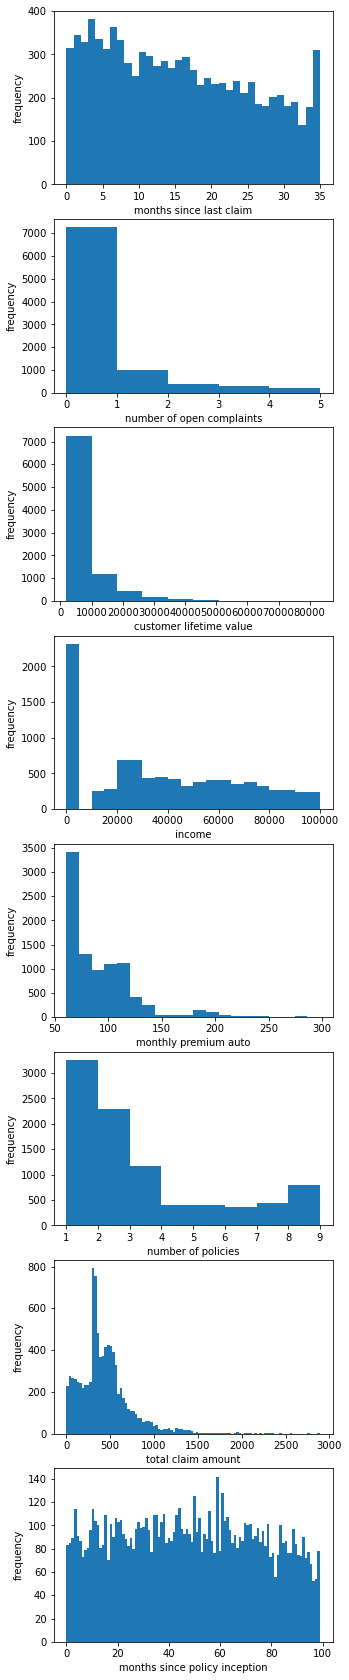

In [12]:
fig, ax = plt.subplots(figsize = (5, 30))

plt.subplot(8,1,1)
plt.hist(df_numerical['months since last claim'], bins = 35)
plt.xlabel('months since last claim')
plt.ylabel('frequency')

plt.subplot(8,1,2)
plt.hist(df_numerical['number of open complaints'], bins = 5)
plt.xlabel('number of open complaints')
plt.ylabel('frequency')

plt.subplot(8,1,3)
plt.hist(df_numerical['customer lifetime value'], bins = 10)
plt.xlabel('customer lifetime value')
plt.ylabel('frequency')

plt.subplot(8,1,4)
plt.hist(df_numerical['income'], bins = 20)
plt.xlabel('income')
plt.ylabel('frequency')

plt.subplot(8,1,5)
plt.hist(df_numerical['monthly premium auto'], bins = 20)
plt.xlabel('monthly premium auto')
plt.ylabel('frequency')

plt.subplot(8,1,6)
plt.hist(df_numerical['number of policies'], bins = 8)
plt.xlabel('number of policies')
plt.ylabel('frequency')

plt.subplot(8,1,7)
plt.hist(df_numerical['total claim amount'], bins = 100)
plt.xlabel('total claim amount')
plt.ylabel('frequency')

plt.subplot(8,1,8)
plt.hist(df_numerical['months since policy inception'], bins = 100)
plt.xlabel('months since policy inception')
plt.ylabel('frequency')

plt.show()

Do the distributions for different numerical variables look like a normal distribution? - I don't know

## For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

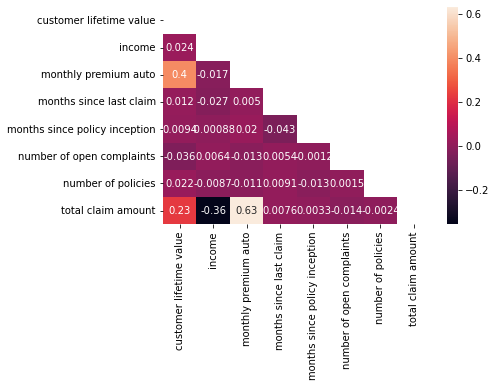

In [13]:
# Use Pearson correlation matrix to find collinearity

# Create correlation matrix
corr = df_numerical.corr()

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype = bool))

# Draw the heatmap
sns.heatmap(corr, annot = True, mask = mask)

plt.show()

## Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [11]:
# I can't identify high correlatioin > 0.9

## Lab 5

## Separating the target "total claim amount" with x-y split

In [15]:
#x-y split

y = df['total claim amount']
x = df.drop(['total claim amount'], axis=1)
x.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### Normalize (numerical) 


### First get numerical data

In [16]:
## I created a new numerical and categorical variable for the new dataframes to repeat this code


In [17]:
x_numerical = x.select_dtypes(include = np.number)
x_categorical = x.select_dtypes(include = 'object')
x_numerical

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


In [18]:
#Transform data to with MinMaxScaler to Normalize it 

In [22]:
transformer = MinMaxScaler().fit(x_numerical) 
x_minmax = transformer.transform(x_numerical)
print(x_minmax.shape)

(9134, 7)


In [23]:
x_numerical_norm = pd.DataFrame(x_minmax,columns=x_numerical.columns)
x_numerical_norm.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,0.074999,0.376645,0.135946,0.431343,0.485501,0.076878,0.245771
std,0.084382,0.303857,0.145181,0.287807,0.281879,0.182077,0.298773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.025744,0.000000,0.029536,0.171429,0.242424,0.000000,0.000000
50%,0.047677,0.338959,0.092827,0.400000,0.484848,0.000000,0.125000
75%,0.086754,0.623318,0.202532,0.657143,0.717172,0.000000,0.375000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## LAB 6

- One Hot/Label Encoding (categorical).

In [24]:
# using the categorical data from: x_categorical = df.select_dtypes(include = 'object')
# and x = df.drop(['total claim amount'], axis=1) -> dataframe without "total claim amount"

In [25]:
#Encoding test for categorical columns with get dummies on the whole data frame for categorical columns
#Using ENCODING WITH Get_dummies

In [26]:
cat_data = pd.get_dummies(df, drop_first=True)
cat_data

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,customer_AA11235,customer_AA16582,...,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,0,0,...,0,0,0,0,0,0,0,1,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,0,0,...,0,0,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,0,0,...,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,0,0,...,0,1,0,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,44,0,1,138.130879,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,3096.511217,21604,79,14,28,0,1,379.200000,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,8163.890428,0,85,9,37,3,2,790.784983,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,7524.442436,21941,96,34,3,0,3,691.200000,0,0,...,1,0,0,0,0,0,0,0,0,0


In [27]:
#shot categorical columns
x_categorical.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective to date', 'employmentstatus', 'gender', 'location code',
       'marital status', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'vehicle class', 'vehicle size'],
      dtype='object')

In [28]:
#use OneHotEncoder to convert categorical data
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(x_categorical)
encoder.get_feature_names()

encoded = encoder.transform(x_categorical).toarray()
cat_encoded = pd.DataFrame(encoded)

cat_encoded.columns = encoder.get_feature_names()
cat_encoded.head()

,x0_AA11235,x0_AA16582,x0_AA30683,x0_AA34092,x0_AA35519,x0_AA56476,x0_AA69265,x0_AA71604,x0_AA93585,x0_AB13432,...,x13_Branch,x13_Call Center,x13_Web,x14_Luxury Car,x14_Luxury SUV,x14_SUV,x14_Sports Car,x14_Two-Door Car,x15_Medsize,x15_Small
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
## Concat DataFrames -> numerical + categorical

In [30]:
final_df = pd.concat([x_numerical_norm, cat_encoded], axis=1)
final_df.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,x0_AA11235,x0_AA16582,x0_AA30683,...,x13_Branch,x13_Call Center,x13_Web,x14_Luxury Car,x14_Luxury SUV,x14_SUV,x14_Sports Car,x14_Two-Door Car,x15_Medsize,x15_Small
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Train-test split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(final_df, y, test_size=0.3, random_state=42)

## Apply linear regression

In [32]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

## Predict on test data

In [33]:
predictions  = model.predict(x_test)
predictions.shape

(2741,)

## Evaluate the model

In [38]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.7268225618022428, 149.33402575860976, 22300.651249273124)

### Model Validation

- Description:
  - R2. 
  - MSE. 
  - RMSE. 
  - MAE. 

In [40]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("MAE = ", MAE)

r2 =  0.7268225618022428
RMSE =  149.33402575860976
MSE =  22300.651249273124
MAE =  103.69954081814988


## Lab 7

In [41]:
## Drop columns train model
x_cat_final = x_categorical.drop(['customer', 'effective to date'], axis=1)

x_cat_final.head()

,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [42]:
#use encoding with OneHotEncoder to convert categorical columns

In [43]:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(x_cat_final)
encoder.get_feature_names()

encoded = encoder.transform(x_cat_final).toarray()
cat_encoded = pd.DataFrame(encoded)

cat_encoded.columns = encoder.get_feature_names()
cat_encoded.head()

,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_Yes,x2_Extended,x2_Premium,x3_College,x3_Doctor,x3_High School or Below,...,x11_Branch,x11_Call Center,x11_Web,x12_Luxury Car,x12_Luxury SUV,x12_SUV,x12_Sports Car,x12_Two-Door Car,x13_Medsize,x13_Small
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [47]:
#concat DataFrames -> numerical + categorical
final_df_2 = pd.concat([x_numerical_norm, cat_encoded], axis=1)
final_df_2.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,x0_California,x0_Nevada,x0_Oregon,...,x11_Branch,x11_Call Center,x11_Web,x12_Luxury Car,x12_Luxury SUV,x12_SUV,x12_Sports Car,x12_Two-Door Car,x13_Medsize,x13_Small
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
#train test split -> INCREASED test_size from 0.3 to 0.58

In [93]:
x_train, x_test, y_train, y_test = train_test_split(final_df_2, y, test_size=0.58, random_state=42)

In [94]:
#apply linear regression

In [95]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [96]:
#predict on test data
predictions  = model.predict(x_test)
predictions.shape

(5298,)

In [97]:
#evaluate the model
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.770284938688639, 138.37267585021664, 19146.997421949127)

### Model Validation Test 2

- Description:
  - R2. 
  - MSE. 
  - RMSE. 
  - MAE. 

In [98]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("MAE = ", MAE)

r2 =  0.770284938688639
RMSE =  138.37267585021664
MSE =  19146.997421949127
MAE =  95.9572288981671
